In [ ]:
%load_ext autoreload
%autoreload 2

In [10]:
import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu"

import jax
import jax.numpy as jnp
from jax.tree_util import Partial
key = jax.random.key(137)
import matplotlib.pyplot as plt

from scipy.spatial import KDTree
import jaxkd as jk

KD tree neighbors:     [  0 104 188 173 238 232]
Brute force neighbors: [  0 104 188 173 238 232]


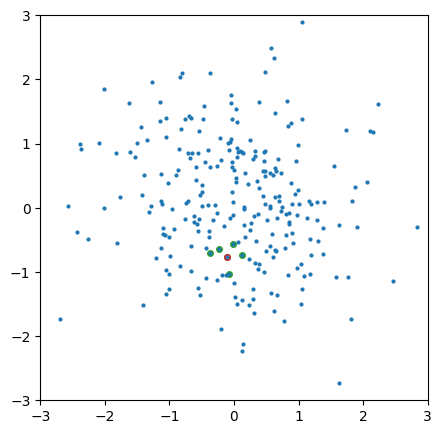

In [57]:
# Visualize with a few points
n_points = 256
key, subkey = jax.random.split(key)
points = jax.random.normal(subkey, shape=(n_points, 2))
tree = jk.make_kd_tree(points)
neighbors, distances = jk.query_neighbors(points[0], points, *tree, k=6)

print('KD tree neighbors:    ', neighbors)
print('Brute force neighbors:', jnp.argsort(jnp.linalg.norm(points - points[0], axis=1))[:len(neighbors)])

plt.figure(figsize=(5,5))
plt.scatter(*points[neighbors].T, s=16, c='C2')
plt.scatter(*points[0], s=16, c='C3')
plt.scatter(*points.T, s=4, c='C0')
plt.gca().set(xlim=(-3, 3), ylim=(-3, 3))
plt.show()

In [60]:
# Test speed
n_points = 1024 * 1024
key, subkey = jax.random.split(key)
points = jax.random.normal(subkey, shape=(n_points, 2))
tree = jk.make_kd_tree(points)
tree[0]

Array([164279, 907183, 609926, ..., 923378, 670415, 644187], dtype=int32)

In [91]:
# Find neighbors for all points
neighbors, distances = jax.vmap(lambda query: jk.query_neighbors(query, points, *tree, k=6))(points[:100000])
neighbors

Array([[      0,  771139,  416949,  641124,  667498,  363836],
       [      1,  262583,  359224,  736282,  523147,   97217],
       [      2,  105308,  718106,  729320,  693883,  775953],
       ...,
       [  99997,  989598, 1000660,  979681,  618529,  388857],
       [  99998,  564622,  563157,  479509,  912881,  136155],
       [  99999,  392076,  462164,  320985,  442637,  952299]],      dtype=int32)

In [66]:
# Build scipy KDTree
scipy_tree = KDTree(points)

In [ ]:
# Find neighbors for all points
scipy_tree.query(points, k=6, workers=-1)[1]

array([[      0,  771139,  416949,  641124,  667498,  363836],
       [      1,  262583,  359224,  736282,  523147,   97217],
       [      2,  105308,  718106,  729320,  693883,  775953],
       ...,
       [1048573,  130551,  517906,  108310,  958858,   16787],
       [1048574,   49855,  840464,  806010,   51620,  860938],
       [1048575,  615344,  492857,  586855, 1002141,  333058]],
      shape=(1048576, 6))